### 모델 호출

In [40]:
from ckonlpy.tag import Twitter
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

### Train data 호출

#### 삼미, 2010~2015

In [7]:
train_data=pd.read_csv('sammi.csv',encoding='utf-8')

In [8]:
train_data[:100]

,title,date,content,url
0,"김문수 경기지사, 시흥 삼미시장 민생탐방",2013.11.22. 오전 9:16,【수원=뉴시스】유명식 기자 = 김문수 경기도지사가 22일 시흥시 신천동에 있는 삼미...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,[특징주] 알앤엘삼미 새 대표 라정찬‥이틀째 상한가,2013.04.25. 오전 10:36,알앤엘삼미가 최근 최대주주로 올라선 라정찬 알앤엘바이오 회장이 새 대표로 선임됐다는...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,[톡톡 이상품] 삼미통상 / 삼미오븐쿡,2013.10.10. 오전 7:05,일반적인 프라이팬이나 냄비를 가열하면 바닥면 온도는 높게 올라가지만 조리기 옆면과 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[특징주] 알앤엘삼미, 최대주주 변경 소식에 강세",2013.04.19. 오전 11:19,최대주주가 변경된 알앤엘삼미(007390)가 급등하고 있다.\n\n19일 오전 10...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"김문수, “참신한 디자인으로 전통시장 더욱 사랑받길”",2013.11.23. 오후 11:44,시흥시 삼미전통시장을 찾은 김문수 경기도지사가 전통시장 활성화 방안을 발표한 용인송...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...
95,울산시민아카데미 개강…서상록 대표 초청 강의,2013.03.06. 오전 10:46,［헤럴드경제=이수곤 기자］울산시는 7일 오후 울산시청 대강당에서 박맹우<사진> 시장...,https://news.naver.com/main/read.nhn?mode=LSD&...
96,[코스닥 공시] 알앤엘삼미 / 디웍스글로벌 / 에스디엔 등,2013.03.06. 오후 9:45,◇알앤엘삼미＝김지택 씨 외 1명이 제기한 의안상정가처분 소송에서 법원이 2013년 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
97,"＜생생코스닥＞알앤엘삼미, 김홍갑 대표이사 신규 선임",2013.02.22. 오후 1:41,알앤엘삼미는 라정찬 대표이사의 사임으로 김홍갑씨를 대표이사로 신규 선임했다고 22일...,https://news.naver.com/main/read.nhn?mode=LSD&...
98,[코스닥 공시] 알앤엘삼미 / 디지털대성 / 에스앤에스텍 등,2013.02.22. 오후 5:15,◇알앤엘삼미＝라정찬 대표이사 사임에 따라 김홍갑 신임 대표이사 선임.\n◇디지털대성...,https://news.naver.com/main/read.nhn?mode=LSD&...


#### 기사 수

In [4]:
print(len(train_data))

684


#### 결측치 제거

In [9]:
train_data = train_data.dropna(how='any')

In [10]:
print(len(train_data))

684


#### 한글만 남게

In [11]:
train_data['content']=train_data['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',"")

In [12]:
train_data[:10]

,title,date,content,url
0,"김문수 경기지사, 시흥 삼미시장 민생탐방",2013.11.22. 오전 9:16,수원뉴시스유명식기자김문수경기도지사가일시흥시신천동에있는삼미전통시장을들렀다올들어서만번째...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,[특징주] 알앤엘삼미 새 대표 라정찬‥이틀째 상한가,2013.04.25. 오전 10:36,알앤엘삼미가최근최대주주로올라선라정찬알앤엘바이오회장이새대표로선임됐다는소식에이틀째급등세...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,[톡톡 이상품] 삼미통상 / 삼미오븐쿡,2013.10.10. 오전 7:05,일반적인프라이팬이나냄비를가열하면바닥면온도는높게올라가지만조리기옆면과상부까지는열이잘전달...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[특징주] 알앤엘삼미, 최대주주 변경 소식에 강세",2013.04.19. 오전 11:19,최대주주가변경된알앤엘삼미가급등하고있다일오전시분현재알앤엘삼미는전날보다오른원에거래되고있...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"김문수, “참신한 디자인으로 전통시장 더욱 사랑받길”",2013.11.23. 오후 11:44,시흥시삼미전통시장을찾은김문수경기도지사가전통시장활성화방안을발표한용인송담대학생들과기념촬...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,"알앤엘바이오, 알앤엘삼미와 합병 취소",2013.02.25. 오후 1:51,알앤엘바이오가계열사인알앤엘삼미와의합병을백지화할예정이다알앤엘바이오는일알앤엘삼미와의합병...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,"[더벨]라정찬, 알앤엘삼미 경영권에 집착한 이유?",2013.05.02. 오전 10:19,더벨김경은기자알앤엘바이오의몰락알앤엘바이오주요매출수단으로삼기위한포석으로활용할듯더벨이기...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,"[특징주] 알앤엘삼미, 합병 철회에 하락세",2013.02.26. 오전 10:39,코스닥상장사인알앤엘삼미가알앤엘바이오와의합병무산에주가가하락하고있다알앤엘삼미는일오전시분...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,[상품장터] 삼미통상 / 삼미오븐쿡,2013.02.07. 오전 7:07,주방조리기구전문업체삼미통상대표김차식에서음식물이잘타지않는기능성냄비삼미오븐쿡시리즈를판매...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,"알앤엘삼미, 라정찬 회장 대상 15억 규모 BW 발행",2013.04.01. 오후 2:31,이데일리김기훈기자알앤엘삼미는운영자금을마련하기위해라정찬알앤엘바이오회장을대상으로억원규모...,https://news.naver.com/main/read.nhn?mode=LSD&...


#### 불용어 처리

In [13]:
stopwords = ['의','가','하다','이','은','들','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#### 형태소 분석기 (customized konlpy의 Twitter 사용)

In [14]:
twitter=Twitter()
tokenized_data=[]
for sentence in train_data['content']:
    tmpx=twitter.morphs(sentence,stem=True)
    tmpx=[word for word in tmpx if not word in stopwords]
    tokenized_data.append(tmpx)

D:\00.dev\Anaconda\envs\team3-py38\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


#### 기사 분석

기사의 최대 길이: 6703
기사의 평균 길이: 440.40497076023394


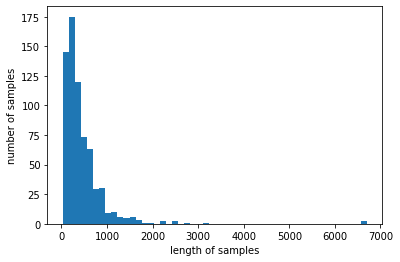

In [15]:
print('기사의 최대 길이:', max(len(l) for l in tokenized_data))
print('기사의 평균 길이:', sum(len(l) for l in tokenized_data)/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2Vec

In [16]:
wv_model=Word2Vec(sentences = tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

size : 포스태깅된 컨텐츠를 100차원의 벡터로 바꿔라<br>
window : 주변단어는 앞뒤로 5개까지 보되,<br>
min_count : 코퍼스 내 출현 빈도가 5번 미만인 단어는 분석에서 제외해라<br>
workers : CPU는 쿼드코어를 써라<br>
sg : 분석 방법은 CBOW를 사용해라 (0=CBOW, 1=skipgram) <br>
iter : 만약 100번 학습하려면 iter=100 추가

In [17]:
wv_model.wv.vectors.shape      # 완성된 임베딩 매트릭스의 크기 확인

(7607, 100)

In [18]:
print(wv_model.wv.most_similar('부도'))

[('서다', 0.9956775307655334), ('과정', 0.9951983094215393), ('해체', 0.9947237968444824), ('존속', 0.9943801164627075), ('허용', 0.9938596487045288), ('일관', 0.9938076734542847), ('우려', 0.9934348464012146), ('은세계', 0.9933713674545288), ('악재', 0.9931285381317139), ('실사', 0.9928656220436096)]


In [19]:
print(wv_model.wv.most_similar('상장폐지'))

[('미가', 0.992369532585144), ('종헌', 0.9886391162872314), ('후너스', 0.9878257513046265), ('일신상', 0.986327052116394), ('사인', 0.9845751523971558), ('또알앤', 0.9839998483657837), ('상장', 0.9836323857307434), ('프라임', 0.9836236834526062), ('흡수', 0.9833095073699951), ('한성', 0.9831281900405884)]


<ipython-input-19-e62321b7ca0c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('상장폐지'))


In [20]:
print(wv_model.wv.most_similar(positive=['부도'],topn=100))

[('서다', 0.9956775307655334), ('과정', 0.9951983094215393), ('해체', 0.9947237968444824), ('존속', 0.9943801164627075), ('허용', 0.9938596487045288), ('일관', 0.9938076734542847), ('우려', 0.9934348464012146), ('은세계', 0.9933713674545288), ('악재', 0.9931285381317139), ('실사', 0.9928656220436096), ('인수합병', 0.9927133917808533), ('중견', 0.992060124874115), ('뒤', 0.9920027256011963), ('공정', 0.9917535185813904), ('상생', 0.9915987849235535), ('방침', 0.9914650917053223), ('이끌다', 0.9914185404777527), ('취직', 0.9913638830184937), ('약하다', 0.9911699295043945), ('겪다', 0.9910182952880859), ('사가', 0.9909682869911194), ('정상화', 0.9904907941818237), ('치면', 0.9901754260063171), ('번번이', 0.9901726841926575), ('디벨로퍼', 0.9901628494262695), ('위기', 0.9900745153427124), ('견제', 0.9899135231971741), ('빙그레', 0.9898884296417236), ('선언', 0.9898602366447449), ('법적', 0.9898287057876587), ('정주영', 0.9897588491439819), ('불가피', 0.9895804524421692), ('이집', 0.9895558953285217), ('물러나다', 0.989425003528595), ('즉각', 0.9892916083335876), ('뇌성마비',

<ipython-input-20-38b481aa6f7c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar(positive=['부도'],topn=100))


### FastText

In [17]:
from gensim.models import FastText
ft_model=FastText(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [18]:
print(ft_model.most_similar('부도'))

<ipython-input-18-c3ed092962c6>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('부도'))


[('해체', 0.9986094832420349), ('성명', 0.9968620538711548), ('기업인', 0.9965665340423584), ('경영인', 0.9963040947914124), ('서다', 0.9955554604530334), ('위기', 0.9949853420257568), ('당시', 0.9948784708976746), ('아베', 0.9942411184310913), ('에나', 0.9942100048065186), ('우려', 0.994184136390686)]


In [19]:
print(ft_model.most_similar('상장폐지'))

[('상장', 0.9952383041381836), ('내츄럴', 0.9931573271751404), ('윤석금', 0.9883977174758911), ('글벳', 0.9879368543624878), ('한성', 0.987694501876831), ('종헌', 0.9864240884780884), ('서시', 0.9854982495307922), ('오븐', 0.9836865067481995), ('특수', 0.9835560321807861), ('한보', 0.9833957552909851)]


<ipython-input-19-e62321b7ca0c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('상장폐지'))


In [21]:
print(ft_model.most_similar(positive=['부도'],topn=100))

[('해체', 0.9986094832420349), ('성명', 0.9968620538711548), ('기업인', 0.9965665340423584), ('경영인', 0.9963040947914124), ('서다', 0.9955554604530334), ('위기', 0.9949853420257568), ('당시', 0.9948784708976746), ('아베', 0.9942411184310913), ('에나', 0.9942099452018738), ('우려', 0.994184136390686), ('개종', 0.9941673278808594), ('권', 0.9941338300704956), ('십', 0.9940059185028076), ('이경영', 0.9939094185829163), ('청보식품', 0.9938521385192871), ('상생', 0.9935480356216431), ('이미지', 0.9934748411178589), ('백년', 0.9933434128761292), ('유력', 0.9933005571365356), ('이번', 0.9929134845733643), ('재무', 0.99263995885849), ('과정', 0.9925795793533325), ('불가피', 0.9924225807189941), ('증명', 0.992415726184845), ('뒤', 0.9922875165939331), ('종속', 0.9919579029083252), ('포스코에너지', 0.9915587306022644), ('계위', 0.9914814233779907), ('급락', 0.9914547204971313), ('구개', 0.9914458990097046), ('일관', 0.9912733435630798), ('유동성', 0.9911813735961914), ('존', 0.9910657405853271), ('낙찰', 0.9910581707954407), ('대기업', 0.9909499883651733), ('금융', 0.99069

<ipython-input-21-38b481aa6f7c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar(positive=['부도'],topn=100))


### 데이터 호출

#### 2015년 전체 data

In [42]:
train_data2=pd.read_csv('2015.csv',encoding='utf-8')
train_data2

,title,date,content,url
0,"[Hot-Line] “AJ렌터카, 현 주가는 저평가 수준”",2015.12.28. 오전 8:41,유진투자증권은 28일 AJ렌터카에 대해 최근 급격히 하락한 주가로 저평가 국면에 진...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,"AJ렌터카, 美 금리 인상 우려 과도 ‘매수’",2015.12.29. 오전 10:57,유진투자증권은 AJ렌터카에 대해 28일 “미국 금리인상에 따른 주가 하락의 영향은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,"[특징주]AJ렌터카, '절대 저평가' 분석에 상승 전환",2015.12.28. 오전 9:39,[이데일리 이명철 기자] AJ렌터카(068400)가 미국 금리인상에 대한 우려가 과...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[인베스트조선][2016년 산업전망] 렌터카 시장, 신규플레이어 진출에도 빅4 체...",2015.12.30. 오전 7:00,카드사와 캐피탈사 렌터카 사업 진출 가속화\n한신평 “신규 진입자들의 영향 미미할 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"장기렌트카/자동차리스, 2016년 새해맞이! 장기렌트카 렌탈 서비스로 새 차 마...",2015.12.30. 오전 12:01,2015년이 채 이틀도 남지 않았다. 지속적인 경제 불황이 계속되고 있지만 장기렌트...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...
142796,(종목포커스) 3분기 실적 급증!,2015.08.19. 오전 9:23,<3분기 실적 급증 전망>\n\n쇼박스의 2분기 매출액은 전년동기비 12.0% 감소...,https://news.naver.com/main/read.nhn?mode=LSD&...
142797,(종목레이더) 근본적인 회사 변모의 초입!,2015.08.21. 오전 8:22,<올해 사상 최대 실적 예상>\n\n코리아써키트는 2분기 영업이익이 111억원(Yo...,https://news.naver.com/main/read.nhn?mode=LSD&...
142798,(종목레이더) 근본적인 회사 변모의 초입!,2015.08.20. 오전 8:52,<2분기 실적 당사 추정치 부합>\n\n2Q15 인선이엔티의 실적은 당사 추정치에 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
142799,(종목레이더) 예상치 상회! 하반기 방향 좋다!,2015.08.18. 오전 10:12,<2분기 순이익은 기대치 상회>\n\n2분기 연결 기준 매출액과 영업이익은 전년동기...,https://news.naver.com/main/read.nhn?mode=LSD&...


#### 결측치 제거

In [43]:
train_data2=train_data.dropna(how='any')

#### 기사 수

In [44]:
len(train_data2)

142801

#### 한글만 남게

In [45]:
train_data2['content']=train_data2['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',"")

In [46]:
train_data2.head()

,title,date,content,url
0,"[Hot-Line] “AJ렌터카, 현 주가는 저평가 수준”",2015.12.28. 오전 8:41,유진투자증권은일렌터카에대해최근급격히하락한주가로저평가국면에진입했다며투자의견매수와목표주...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,"AJ렌터카, 美 금리 인상 우려 과도 ‘매수’",2015.12.29. 오전 10:57,유진투자증권은렌터카에대해일미국금리인상에따른주가하락의영향은미미할전망이라며투자의견매수목...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,"[특징주]AJ렌터카, '절대 저평가' 분석에 상승 전환",2015.12.28. 오전 9:39,이데일리이명철기자렌터카가미국금리인상에대한우려가과도하고렌터카사업에대한정책지원기대감으로...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[인베스트조선][2016년 산업전망] 렌터카 시장, 신규플레이어 진출에도 빅4 체...",2015.12.30. 오전 7:00,카드사와캐피탈사렌터카사업진출가속화한신평신규진입자들의영향미미할것강중체제굳어질듯카드사와...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"장기렌트카/자동차리스, 2016년 새해맞이! 장기렌트카 렌탈 서비스로 새 차 마...",2015.12.30. 오전 12:01,년이채이틀도남지않았다지속적인경제불황이계속되고있지만장기렌트카시장만큼은활기를띠고있다신차...,https://news.naver.com/main/read.nhn?mode=LSD&...


#### 불용어 처리

In [47]:
stopwords = ['의','가','하다','이','은','들','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#### 형태소 분석기

In [48]:
twitter=Twitter()
tokenized_data2=[]
for sentence in train_data2['content']:
    tmpx=twitter.morphs(sentence,stem=True)
    tmpx=[word for word in tmpx if not word in stopwords]
    tokenized_data2.append(tmpx)

D:\00.dev\Anaconda\envs\team3-py38\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


#### 기사 분석

기사의 최대 길이: 15086
기사의 평균 길이: 344.997079852382


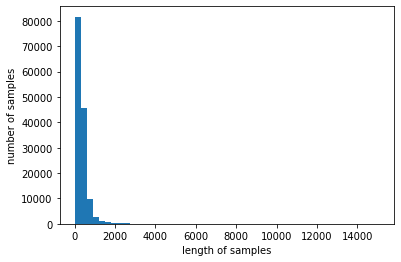

In [49]:
print('기사의 최대 길이:', max(len(l) for l in tokenized_data2))
print('기사의 평균 길이:', sum(len(l) for l in tokenized_data2)/len(tokenized_data2))
plt.hist([len(s) for s in tokenized_data2], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2Vec

In [50]:
wv_model2= Word2Vec(sentences = tokenized_data2, size = 100, window=5, min_count = 5, workers = 4, sg=0)

In [27]:
wv_model2.wv.vectors.shape

(7607, 100)

In [51]:
print(wv_model2.wv.most_similar('부도'))

[('부가', 0.7554649114608765), ('부의', 0.6062743663787842), ('부와', 0.586667537689209), ('부결', 0.5606884360313416), ('무위', 0.5410023927688599), ('부등', 0.534579873085022), ('부가대', 0.5115238428115845), ('신심', 0.49906980991363525), ('론도', 0.46637529134750366), ('부실', 0.464468777179718)]


In [52]:
print(wv_model2.wv.most_similar('상장폐지'))

[('상폐', 0.7448605298995972), ('관리종목', 0.6664603352546692), ('이의신청', 0.6151034235954285), ('코데즈', 0.6028000116348267), ('파로스', 0.5630977749824524), ('사사유', 0.5566840171813965), ('상장', 0.5469402074813843), ('파산신청', 0.5409775972366333), ('자본잠식', 0.539065957069397), ('태창', 0.5372215509414673)]


In [53]:
print(wv_model2.wv.most_similar(positive=['부도'],topn=100))

[('부가', 0.7554649710655212), ('부의', 0.606274425983429), ('부와', 0.586667537689209), ('부결', 0.5606884956359863), ('무위', 0.5410024523735046), ('부등', 0.534579873085022), ('부가대', 0.5115238428115845), ('신심', 0.49906986951828003), ('론도', 0.46637535095214844), ('부실', 0.4644688665866852), ('파로', 0.46162909269332886), ('부르다', 0.4598711133003235), ('론전', 0.4561780095100403), ('러건', 0.45009303092956543), ('부및', 0.4327280819416046), ('가결', 0.4323975443840027), ('법부', 0.4279526472091675), ('부및구', 0.4221044182777405), ('밀화', 0.4183788299560547), ('채월', 0.41166430711746216), ('영채', 0.40919581055641174), ('체성', 0.4088013768196106), ('시비', 0.4079754948616028), ('간부', 0.40583473443984985), ('태선', 0.4057927429676056), ('관리종목', 0.4037337303161621), ('무위법', 0.40147218108177185), ('운규', 0.39572542905807495), ('밀본', 0.3952888250350952), ('부다', 0.392327219247818), ('부쪽', 0.39061957597732544), ('자진', 0.39011743664741516), ('번번이', 0.3864089250564575), ('도의', 0.3850138187408447), ('부심', 0.38237205147743225), ('러'

In [54]:
print(wv_model2.wv.most_similar(positive=['폭망'],topn=50))

KeyError: "word '폭망' not in vocabulary"

### FastText

In [55]:
from gensim.models import FastText
ft_model2=FastText(sentences=tokenized_data2, size=100, window=5, min_count=5, workers=4, sg=0)

In [56]:
print(ft_model2.most_similar('부도'))

<ipython-input-56-850e4f57b124>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(ft_model2.most_similar('부도'))


[('부가', 0.7153676152229309), ('흥부가', 0.7081400156021118), ('부도옹', 0.6929551362991333), ('부도덕', 0.6698375940322876), ('대부도', 0.6642477512359619), ('부도지', 0.6606009006500244), ('부와', 0.6068463325500488), ('부의', 0.576937198638916), ('점선', 0.5568804740905762), ('법부', 0.5235387086868286)]


In [57]:
print(ft_model2.wv.most_similar(positive=['부도'],topn=100))

[('부가', 0.7153676152229309), ('흥부가', 0.7081400156021118), ('부도옹', 0.6929551362991333), ('부도덕', 0.6698375940322876), ('대부도', 0.6642477512359619), ('부도지', 0.6606009006500244), ('부와', 0.6068463325500488), ('부의', 0.576937198638916), ('점선', 0.5568804740905762), ('법부', 0.5235387086868286), ('해부도', 0.5222742557525635), ('부결', 0.5180884003639221), ('무위', 0.5119829177856445), ('부르다', 0.5047814846038818), ('부등', 0.5046533346176147), ('국가부도', 0.5002713799476624), ('파로', 0.49967920780181885), ('부가대', 0.4996791481971741), ('부및', 0.4881306290626526), ('농부가', 0.48684343695640564), ('론전', 0.48677337169647217), ('부및구', 0.48561692237854004), ('부등가', 0.48353904485702515), ('파로호', 0.481878399848938), ('론도', 0.47060447931289673), ('부의회', 0.46108755469322205), ('중정부', 0.4591881036758423), ('신심', 0.45788663625717163), ('무위법', 0.45327118039131165), ('청파로', 0.45098501443862915), ('러', 0.43995246291160583), ('사표', 0.4397374987602234), ('안이', 0.4345548152923584), ('졸속', 0.42909547686576843), ('들통', 0.42824569344

In [58]:
print(ft_model2.wv.most_similar(positive=['폭망'],topn=50))

[('금오공대', 0.8092167377471924), ('감리교신학대', 0.7937999367713928), ('침례신학대', 0.7806286811828613), ('신학대', 0.7784706354141235), ('부산외국어대학교', 0.7761512398719788), ('목포해양대', 0.772444486618042), ('대구가톨릭대학교', 0.772090494632721), ('충남대학교', 0.7646075487136841), ('공대', 0.7641941905021667), ('청남대', 0.7638347148895264), ('국립대', 0.7634862661361694), ('충북보건과학대', 0.7610419392585754), ('단국대학교', 0.7609955072402954), ('영산선학대', 0.7608122825622559), ('우석대학교', 0.7599954605102539), ('부경대', 0.759803295135498), ('호서대학교', 0.758084237575531), ('부산대학교', 0.757837176322937), ('나사렛대학교', 0.7573678493499756), ('충남대', 0.7571316957473755), ('중부대학교', 0.756668746471405), ('아세아연합신학대', 0.7548809051513672), ('건양대', 0.7547966241836548), ('배재대', 0.7545245885848999), ('대구대학교', 0.7530988454818726), ('동신대학교', 0.7511757612228394), ('공주대학교', 0.7489050626754761), ('대진대학교', 0.748040497303009), ('부경대학교', 0.7474848628044128), ('목포가톨릭대', 0.7469295263290405), ('장안대학교', 0.746216893196106), ('차의과학대', 0.7433689832687378), ('한영신학대', 0.7431541